In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from highlight_text import fig_text
from scipy import stats
import random
import seaborn as sns
import os

In [2]:
print(os.getcwd())

/Users/rao/Desktop/Football_Data


In [3]:
df1 = pd.read_csv(r'/Users/rao/Desktop/Football_Data/Barca_Alaves.csv')
df1['y'] = 80-.8*df1['y']
df1['x'] = 1.2*df1['x']
df1 = df1.fillna(0)
df1['playerId'] = df1['playerId'].astype(int) 
df1 = df1[df1['teamId']==65].reset_index()
df1 = df1[(df1['type/value']==1)]
players = df1['playerId'].unique()
starters = players[0:12]
starters.sort()
starters = list(starters)
del starters[1]

In [4]:
players

array([ 11119,  44721,  80241,  80774,  89931, 236511, 279423, 351252,
       368409, 372827, 397469, 409030, 402197,  30226, 379205, 299513])

In [5]:
starters

[11119,
 80241,
 80774,
 89931,
 236511,
 279423,
 351252,
 368409,
 372827,
 397469,
 409030]

Text(0.15, 0.08, 'Starting pass locations having outliers are removed')

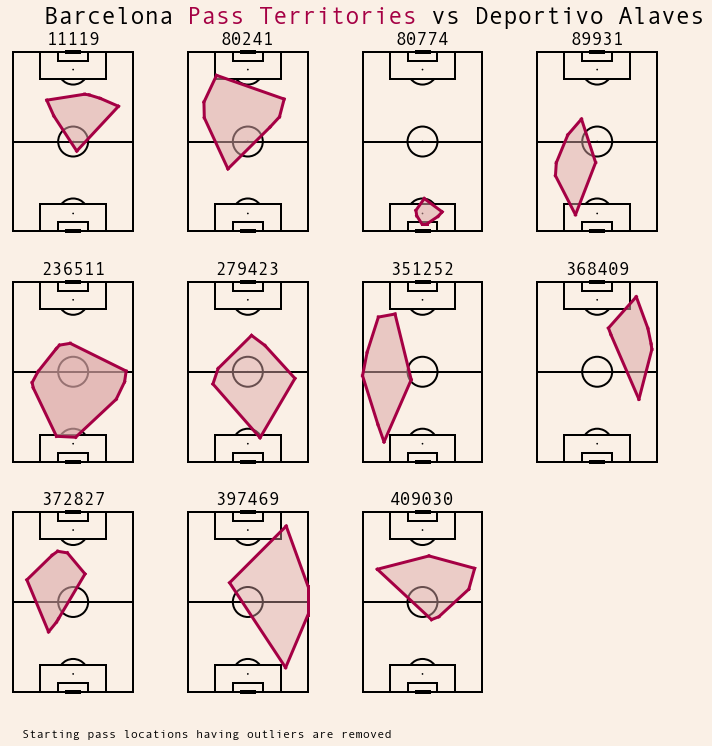

In [17]:
fig, axes = plt.subplots(3,4,figsize=(12,12))
fig.set_facecolor('linen')
axes.flat[-1].set_visible(False)


pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='linen', line_color='black', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)



for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor('#3b3b38')
        pitch.draw(ax=ax)

        df = df1[(df1.playerId == starters[i])]
        df = df[(np.abs(stats.zscore(df[['x','y']])) < .5)]

        points = df[['y','x']].values
        hull = ConvexHull(df[['x','y']])

        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], '#A50044',lw=3)
            ax.fill(points[hull.vertices,0], points[hull.vertices,1], c='#dfa9a9', alpha=0.1)
            ax.set_ylabel(ylabel=' ')


        ax.set_title(label=starters[i],c='black',va='center',ha='center',fontsize=18,fontfamily='Andale Mono')
    except:
        pass


s = f'Barcelona <Pass Territories> vs Deportivo Alaves'
fig_text(s=s,
        x=.175,y=.9,
        fontfamily='Andale Mono',
        highlight_weights=['bold'],
        fontsize=24,
        color='black',
        highlight_colors=['#A50044'],
        zorder=1
       )

fig.text(.15,.08,'Starting pass locations having outliers are removed',fontstyle='italic',
         fontsize=12, fontfamily='Andale Mono', color='black')